<a href="https://colab.research.google.com/github/AbdelRayan/AutomaticSleepScoring/blob/main/Atharv/Granger_Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install spectral_connectivity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity

from spectral_connectivity.simulate import simulate_MVAR

# function to run and plot the results of spectral_granger_causality test

def plot_directional(title, time_series, sampling_frequency, time_halfbandwidth_product=2):
    m = Multitaper(
        time_series,
        sampling_frequency=sampling_frequency,
        time_halfbandwidth_product=time_halfbandwidth_product,
        start_time=0,
    )
    c = Connectivity(
        fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time
    )

    measures = dict(
        pairwise_spectral_granger=c.pairwise_spectral_granger_prediction(),
        #directed_transfer_function=c.directed_transfer_function(),
        #partial_directed_coherence=c.partial_directed_coherence(),
        #generalized_partial_directed_coherence=c.generalized_partial_directed_coherence(),
        #direct_directed_transfer_function=c.direct_directed_transfer_function(),
    )
    #print(c.pairwise_spectral_granger_prediction())
    n_signals = time_series.shape[-1]
    signal_ind2, signal_ind1 = np.meshgrid(np.arange(n_signals), np.arange(n_signals))

    fig, axes = plt.subplots(
        n_signals, n_signals, figsize=(n_signals * 3, n_signals * 3), sharex=True
    )
    fig.suptitle(title)
    for ind1, ind2, ax in zip(signal_ind1.ravel(), signal_ind2.ravel(), axes.ravel()):
        for measure_name, measure in measures.items():
            ax.plot(
                c.frequencies,
                measure[0, :, ind1, ind2],
                label=measure_name,
                linewidth=3,
                alpha=0.8,
            )
        ax.set_title("x{} → x{}".format(ind2 + 1, ind1 + 1), fontsize=15)
        ax.set_ylim((0, np.max([np.nanmax(np.stack(list(measures.values()))), 1.05])))

    axes[0, -1].legend()
    plt.tight_layout()

    #fig, axes = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True)
    #axes.plot(c.frequencies, c.power().squeeze())
    #plt.title("Power")

In [6]:
# Checking for stationarity in the data using ADF Test
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller


def adf_test (time_series):
	result = adfuller(time_series)
	print('ADF Statistic: %f' % result[0])
	print('p-value: %f' % result[1])
	print('Critical Values:')
	for key, value in result[4].items():
		print('\t%s: %.3f' % (key, value))

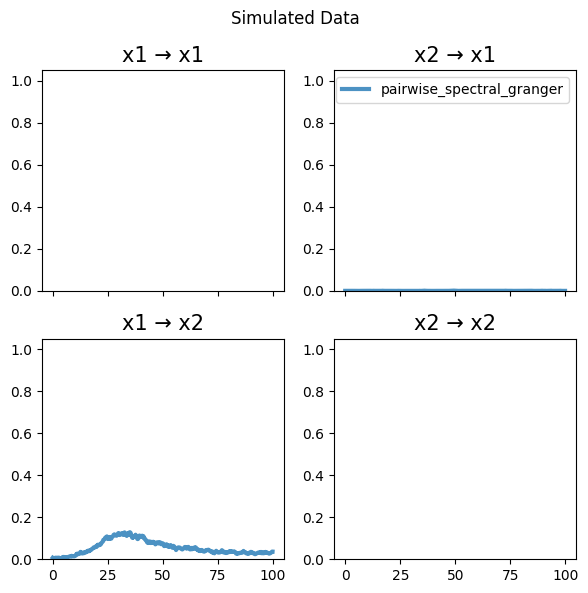

In [ ]:
#simulated data example 1

def ding_example1():
    """Ding, M., Chen, Y., and Bressler, S.L. (2006). 17 Granger causality:
    basic theory and application to neuroscience. Handbook of Time Series
    Analysis: Recent Theoretical Developments and Applications 437.
    """
    sampling_frequency = 200
    n_time_samples, n_lags, n_signals = 1000, 2, 2
    coefficients = np.zeros((n_lags, n_signals, n_signals))

    coefficients[0, ...] = np.array([[0.90, 0.00], [0.16, 0.80]])
    coefficients[1, ...] = np.array([[-0.50, 0.00], [-0.20, -0.50]])

    noise_covariance = np.array([[1.0, 0.4], [0.4, 0.7]])

    return (
        simulate_MVAR(
            coefficients,
            noise_covariance=noise_covariance,
            n_time_samples=n_time_samples,
            n_trials=500,
            n_burnin_samples=500,
        ),
        sampling_frequency,
    )
title='Simulated Data'
plot_directional(title, *ding_example1(), time_halfbandwidth_product=3)

In [ ]:
#Simulated data 2
import numpy as np
import pandas as pd

# Parameters
n_steps = 200  # Number of time steps
np.random.seed(42)  # For reproducibility

# Initialize the time series
y1 = np.zeros(n_steps)
y2 = np.zeros(n_steps)

# Coefficients for the VAR model
alpha1 = 0.5
beta1 = 0.3
alpha2 = 0.4
beta2 = 0.2

# Simulate the time series
for t in range(1, n_steps):
    y1[t] = alpha1 * y1[t-1] + beta1 * y2[t-1] + np.random.normal()
    y2[t] = alpha2 * y2[t-1] + beta2 * y1[t-1] + np.random.normal()

# Creating pandas DataFrame
time_index = pd.date_range(start='2020-01-01', periods=n_steps, freq='D')
data = pd.DataFrame({'y1': y1, 'y2': y2}, index=time_index)

signal_new = np.zeros((200, 2))
signal_new[:, 0] = y1
signal_new[:, 1] = y2

#run the adf test
adf_test(signal_new[:, 0])
adf_test(signal_new[:, 1])

ADF Statistic: -7.656974
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -5.408509
p-value: 0.000003
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


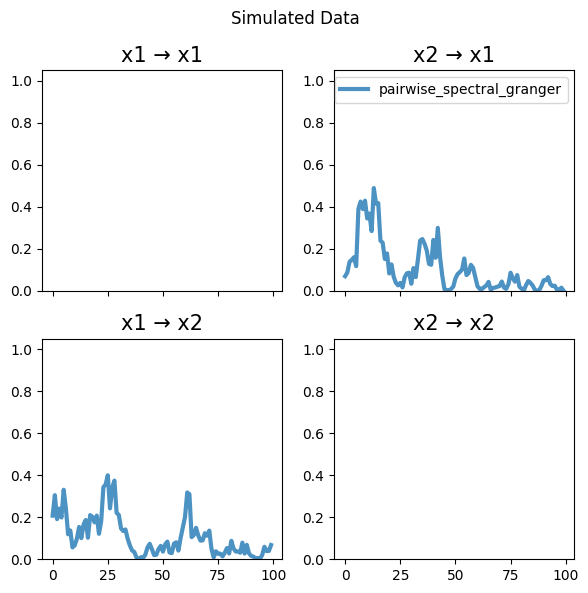

In [ ]:
#Simulated data
plot_directional(title, signal_new, 200, 5)

In [1]:
# Loading the phasic and tonic signals

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving phasic_signal.npy to phasic_signal.npy


ADF Statistic: -9.290612
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -6.288089
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


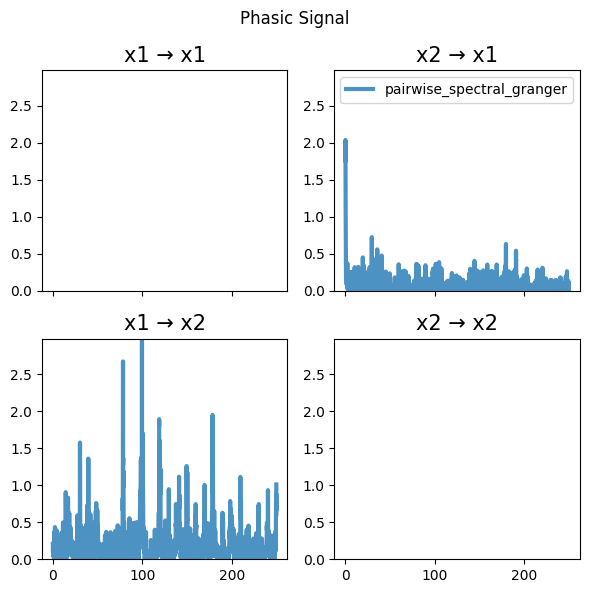

In [ ]:
#Phasic signal

phasic_signal = np.load("phasic_signal.npy")
adf_test(phasic_signal[:, 0])
adf_test(phasic_signal[:, 1])
title = "Phasic Signal"
plot_directional(title, phasic_signal, 500, 5)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tonic_signal.npy to tonic_signal.npy


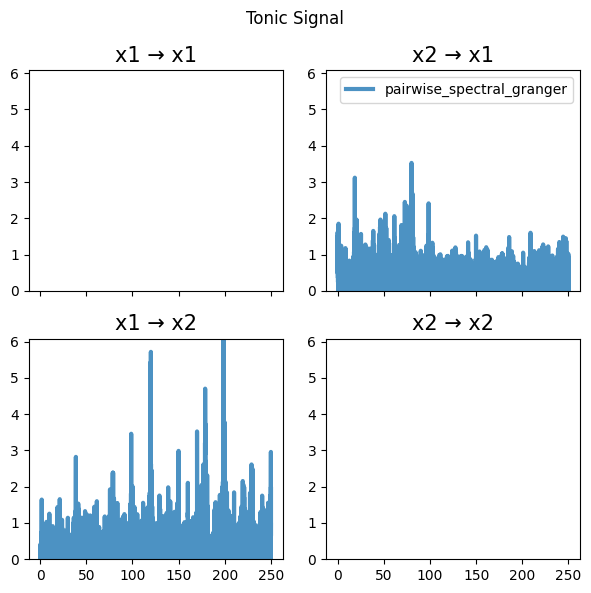

In [10]:
tonic_signal = np.load('tonic_signal.npy')
title = "Tonic Signal"
plot_directional(title, tonic_signal, 500, 5)